In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
entry_data = pd.read_csv('./data/entry_data.csv')
sales_data = pd.read_csv('./data/sales_data.csv')
item_data = pd.read_csv('./data/item_data.csv')
item_entry_data = pd.read_csv('./data/item_entry_data.csv')

In [3]:
entry_data

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [4]:
sales_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507
...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN


In [40]:
item_data.head(60)

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"
5,6,디저트,치즈케이크,"4,000원"
6,7,디저트,블루베리머핀,"3,500원"
7,8,디저트,쿠키(오트밀),"1,500원"
8,9,디저트,크로플,"5,500원"
9,10,디저트,치즈케이크,"1,500원"


In [6]:
item_entry_data

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"
5,6,한국대생,한국대생 요금제,"1,500원"
6,7,18시이후,거리두기4단계,"1,000원"
7,8,심야-조조,심야-조조 요금제,"2,500원"
8,9,일반인,일반요금제,"3,000원"
9,10,일반인,일반요금제,"7,000원"


## 3-2 데이터분석

> 필수문제1 : 월별 매출액 추세

In [7]:
sales_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507
...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN


In [8]:
temp_var = sales_data

In [9]:
#날짜 월별로 만들기
temp_var['결제일시'] =  temp_var['결제일시'].str[:7]
temp_var['결제일시']
# temp_var
# https://hleecaster.com/pandas-data-cleaning-2/

0       2022-04
1       2022-04
2       2022-04
3       2022-04
4       2022-04
         ...   
7100    2021-02
7101    2021-02
7102    2021-02
7103    2021-02
7104    2021-02
Name: 결제일시, Length: 7105, dtype: object

In [10]:
#콤마 없애기
sales_data['결제금액'] = sales_data['결제금액'].str.replace(',','').astype('int64')
# https://rfriend.tistory.com/463
sales_data['결제금액']

0       4500
1       5500
2       4000
3       1000
4       5000
        ... 
7100   -3500
7101    4500
7102   -4500
7103    4000
7104   -4000
Name: 결제금액, Length: 7105, dtype: int64

In [11]:
temp_var[['결제일시', '결제금액']]

,결제일시,결제금액
0,2022-04,4500
1,2022-04,5500
2,2022-04,4000
3,2022-04,1000
4,2022-04,5000
...,...,...
7100,2021-02,-3500
7101,2021-02,4500
7102,2021-02,-4500
7103,2021-02,4000


In [12]:
temp_var[['결제일시', '결제금액']].groupby('결제일시').sum()
# https://ponyozzang.tistory.com/291

,결제금액
결제일시,
2021-02,7000
2021-03,2104500
2021-04,3116600
2021-05,2537000
2021-06,3621500
2021-07,1215000
2021-08,1229000
2021-09,1197500
2021-10,2138500


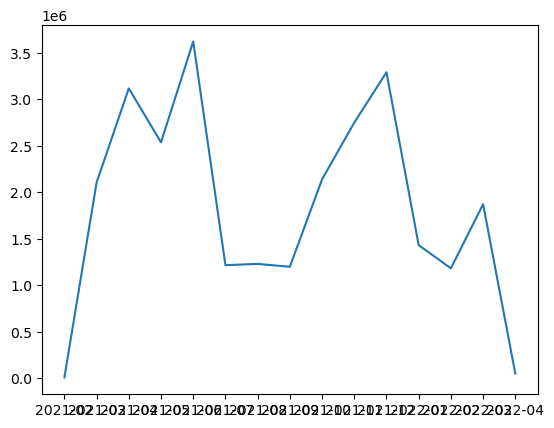

In [13]:
plt.plot(temp_var[['결제일시', '결제금액']].groupby('결제일시').sum())
plt.show()

In [14]:
temp_var[['결제일시', '결제금액']].groupby('결제일시').sum()


,결제금액
결제일시,
2021-02,7000
2021-03,2104500
2021-04,3116600
2021-05,2537000
2021-06,3621500
2021-07,1215000
2021-08,1229000
2021-09,1197500
2021-10,2138500


In [15]:
a = temp_var[['결제일시', '결제금액']].groupby('결제일시').sum()
a
a['결제금액']

결제일시
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: 결제금액, dtype: int64

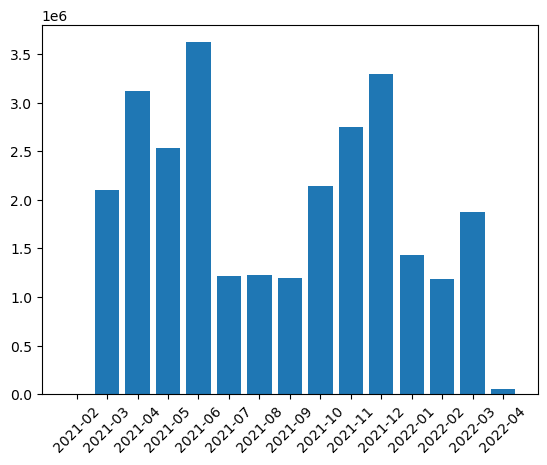

In [16]:
plt.bar(a.index, a['결제금액'])
plt.xticks(rotation=45)
plt.show()
# https://cosmosproject.tistory.com/418

> 필수 문제2: 가장 인기 있는 음식/음료(salses_data를 이용합니다.)

여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
힌트: value_counts() 함수를 사용하세요.

In [17]:
sales_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507
1,2022-04,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507
2,2022-04,선불기1,라면,신용카드,결제완료,1,4000,customer275507
3,2022-04,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507
4,2022-04,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507
...,...,...,...,...,...,...,...,...
7100,2021-02,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN
7101,2021-02,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN
7102,2021-02,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN
7103,2021-02,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN


In [44]:
sales_data[['상품명', '판매수량', '결제금액']]

,상품명,판매수량,결제금액
0,치킨카라아케 6pc,1,4500
1,짜장라면(계란추가),1,5500
2,라면,1,4000
3,비엔나소세지(토핑),1,1000
4,라면(계란/치즈추가),1,5000
5,라면,1,4000
6,소떡소떡,1,3000
7,아이스티,1,3900
8,순살닭다리덮밥,1,8000
9,만두라면,1,5000


In [45]:
sales_data[['상품명', '판매수량', '결제금액']].groupby('상품명').sum()


,판매수량,결제금액
상품명,,
(면)계란추가-국물라면,10,5000
(면)계란후라이 추가-불닭/짜장,20,20000
(면)치즈추가,21,10500
(밥)계란후라이 추가,3,3000
(밥)슈레드치즈추가,3,4500
...,...,...
한돈간장불고기덮밥,15,112500
한돈고추장불고기덮밥,17,127500
허니밀크쉐이크,20,108500


In [54]:
sales_data[['상품명', '판매수량']].groupby('상품명').sum()

,판매수량
상품명,
(면)계란추가-국물라면,10
(면)계란후라이 추가-불닭/짜장,20
(면)치즈추가,21
(밥)계란후라이 추가,3
(밥)슈레드치즈추가,3
...,...
한돈간장불고기덮밥,15
한돈고추장불고기덮밥,17
허니밀크쉐이크,20


In [55]:
sales_data[['상품명', '결제금액']].groupby('상품명').sum()

,결제금액
상품명,
(면)계란추가-국물라면,5000
(면)계란후라이 추가-불닭/짜장,20000
(면)치즈추가,10500
(밥)계란후라이 추가,3000
(밥)슈레드치즈추가,4500
...,...
한돈간장불고기덮밥,112500
한돈고추장불고기덮밥,127500
허니밀크쉐이크,108500


In [60]:
sales_data[['상품명', '판매수량']].groupby('상품명').sum()['판매수량'] 

상품명
(면)계란추가-국물라면         10
(면)계란후라이 추가-불닭/짜장    20
(면)치즈추가              21
(밥)계란후라이 추가           3
(밥)슈레드치즈추가            3
                     ..
한돈간장불고기덮밥            15
한돈고추장불고기덮밥           17
허니밀크쉐이크              20
헤이즐넛라떼(HOT)           2
헤이즐넛라떼(ICE)          14
Name: 판매수량, Length: 100, dtype: int64

In [61]:
sales_data[['상품명', '결제금액']].groupby('상품명').sum()['결제금액']

상품명
(면)계란추가-국물라면           5000
(면)계란후라이 추가-불닭/짜장     20000
(면)치즈추가               10500
(밥)계란후라이 추가            3000
(밥)슈레드치즈추가             4500
                      ...  
한돈간장불고기덮밥            112500
한돈고추장불고기덮밥           127500
허니밀크쉐이크              108500
헤이즐넛라떼(HOT)            9000
헤이즐넛라떼(ICE)           62500
Name: 결제금액, Length: 100, dtype: int64

In [59]:
sales_data['매출'] =  (sales_data[['상품명', '판매수량']].groupby('상품명').sum()['판매수량'] + sales_data[['상품명', '결제금액']].groupby('상품명').sum()['결제금액'])
sales_data['매출']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
7100   NaN
7101   NaN
7102   NaN
7103   NaN
7104   NaN
Name: 매출, Length: 7105, dtype: float64

In [46]:
sales_data[['상품명', '판매수량']].groupby('상품명').sum()


,판매수량
상품명,
(면)계란추가-국물라면,10
(면)계란후라이 추가-불닭/짜장,20
(면)치즈추가,21
(밥)계란후라이 추가,3
(밥)슈레드치즈추가,3
...,...
한돈간장불고기덮밥,15
한돈고추장불고기덮밥,17
허니밀크쉐이크,20


In [20]:
sales_data[['상품명', '판매수량']].groupby('상품명').sum().sort_values(by='판매수량' ,ascending=False)


,판매수량
상품명,
김치볶음밥,1197
라면,742
짜장라면,453
치즈불고기볶음밥,417
계란추가,313
...,...
라면(계란/치즈추가),1
녹차(HOT),1
짜장라면(계란추가),1


In [21]:
sales_data[['상품명', '판매수량']].groupby('상품명').sum().sort_values(by='판매수량' ,ascending=False).head(10)

,판매수량
상품명,
김치볶음밥,1197
라면,742
짜장라면,453
치즈불고기볶음밥,417
계란추가,313
낙지볶음밥,310
새우볶음밥,307
아메리카노(ICE),254
치즈감자튀김,245


In [22]:
b = sales_data[['상품명', '판매수량']].groupby('상품명').sum().sort_values(by='판매수량' ,ascending=False).head(10)

In [23]:
import koreanize_matplotlib

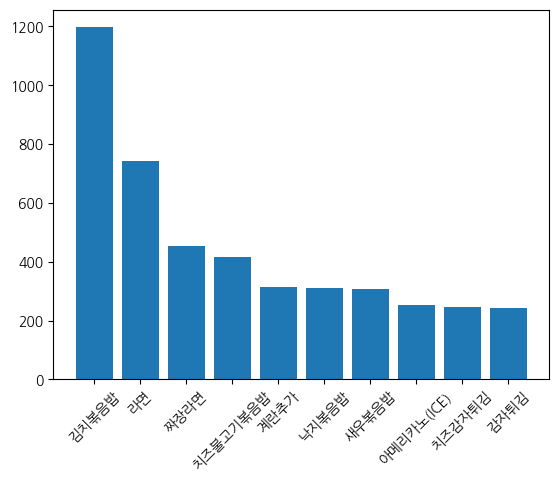

In [24]:
plt.bar(b.index, b['판매수량'])
plt.xticks(rotation=45)
plt.show()

### 판매매출(수*가격)으로 표현해보자! :)

In [38]:
item_data

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"
...,...,...,...,...
169,170,커피,카페모카(ICE),"2,500원"
170,171,커피,헤이즐넛라떼(ICE),"2,500원"
171,172,포장,오늘은 순살닭다리 덮밥,"9,000원"
172,173,포장,오늘은 한돈간장불고기,"8,000원"


In [41]:
# sales = pd.merge(b,item_data)
b = sales_data[['상품명', '판매수량']].groupby('상품명').sum().sort_values(by='판매수량' ,ascending=False).head(10)
b

,판매수량
상품명,
김치볶음밥,1197
라면,742
짜장라면,453
치즈불고기볶음밥,417
계란추가,313
낙지볶음밥,310
새우볶음밥,307
아메리카노(ICE),254
치즈감자튀김,245


In [36]:
b.columns

Index(['판매수량'], dtype='object')